<a href="https://colab.research.google.com/github/anjalisrivastav604/CropDoc/blob/anjalisrivastav604-patch-1/Soil_quality_Testing_Final_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load and Inspect the Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os

import pandas as pd

# Load the dataset (replace 'soil_data.csv' with your actual file path)
# Assuming tab-separated based on the sample you provided
data = pd.read_excel("/content/drive/MyDrive/CropDoc/backends/models/SOIL testing data (1).xlsx")

# Display the first few rows to inspect the data
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Display basic statistics (min, max, mean, etc.) for numerical columns
print("\nBasic statistics of the dataset:")
print(data.describe())

# Optional: Display column names and data types
print("\nColumn names and data types:")
print(data.dtypes)
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values in each column
print("\nMissing values in each column:")
print(data.isnull().sum())

# Display basic statistics (min, max, mean, etc.) for numerical columns
print("\nBasic statistics of the dataset:")
print(data.describe())

# Optional: Display column names and data types
print("\nColumn names and data types:")
print(data.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of the dataset:
   ID's  Sand %  Clay %  Silt %     pH  EC mS/cm    O.M. %  CACO3 %  \
0     1    42.0    38.0    20.0  5.162     0.274  3.783414     0.00   
1     2    54.0    26.0    20.0  6.071     0.355  1.451688     0.00   
2     3    28.0    36.0    36.0  6.921     0.675  1.767599     0.40   
3     4    58.0    20.0    22.0  7.704     0.355  0.718322     6.80   
4     5    33.2    41.2    25.6  7.609     0.392  0.996625     4.39   

   N_NO3 ppm      P ppm  K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm  
0  14.462366  18.608840   147.0  1115.0   91.32   0.894   27.06   1.768   0.40  
1  14.587814  32.742137   180.0  1055.0   60.04   3.660   17.58   1.684   0.41  
2  14.910394  19.024525   183.0  1215.0   61.24   3.060   18.00   1.840   0.46  
3   4.211470   6.276846   116.0   327.0   19.54   1.640    5.04   0.844   0.50  
4   6.1111

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Step 2: Define Soil Quality Labels

In [ ]:
import pandas as pd

# Assuming 'data' is the DataFrame from Step 1
# If not loaded yet, uncomment and adjust the following line:
# data = pd.read_csv('soil_data.csv', delimiter='\t')

# Define the labeling function
def predict_soil_quality(data):
    score = 0

    # pH: Optimal range for most crops is 6.0–7.5
    if 6.0 <= row['pH'] <= 7.5:
        score += 0.25  # High weight since pH is critical
    elif 5.5 <= row['pH'] < 6.0 or 7.5 < row['pH'] <= 8.0:
        score += 0.15  # Suboptimal but manageable
    # Below 5.5 or above 8.0 gets no points (poor)

    # EC: Low salinity is better (<1 mS/cm)
    if row['EC mS/cm'] < 1:
        score += 0.15
    elif 1 <= row['EC mS/cm'] <= 2:
        score += 0.05
    # Above 2 mS/cm gets no points (poor)

    # Organic Matter: Higher is better for fertility
    if row['O.M. %'] > 2:
        score += 0.2  # High weight for fertility
    elif 1 <= row['O.M. %'] <= 2:
        score += 0.1
    # Below 1% gets no points (poor)

    # Macronutrients: N, P, K are key for plant growth
    if row['N_NO3 ppm'] > 10:
        score += 0.1
    if row['P ppm'] > 15:
        score += 0.1
    if row['K ppm '] > 150:
        score += 0.1

    # Texture: Balanced loam (20–50% each) is ideal
    if 20 <= row['Sand %'] <= 50 and 20 <= row['Clay %'] <= 50:
        score += 0.1

    # Classify based on total score (max = 1.0)
    if score >= 0.7:
        return "Good"
    elif score >= 0.4:
        return "Moderate"
    else:
        return "Poor"# backend/models/soil_model.py



# Apply the labeling function to create the 'Quality' column
data['Quality'] = data.apply(label_soil_quality, axis=1)

# Encode the labels numerically for ML (Good=2, Moderate=1, Poor=0)
data['Quality'] = data['Quality'].map({"Good": 2, "Moderate": 1, "Poor": 0})

# Verify the distribution of labels
print("Distribution of soil quality labels:")
print(data['Quality'].value_counts())

# Optional: Display a few rows to check the labels
print("\nSample rows with quality labels:")
print(data[['ID\'s', 'pH', 'EC mS/cm', 'O.M. %', 'N_NO3 ppm', 'P ppm', 'K ppm ', 'Sand %', 'Clay %', 'Quality']].head())

Distribution of soil quality labels:
Quality
2    3531
1     438
0      31
Name: count, dtype: int64

Sample rows with quality labels:
   ID's     pH  EC mS/cm    O.M. %  N_NO3 ppm      P ppm  K ppm   Sand %  \
0     1  5.162     0.274  3.783414  14.462366  18.608840   147.0    42.0   
1     2  6.071     0.355  1.451688  14.587814  32.742137   180.0    54.0   
2     3  6.921     0.675  1.767599  14.910394  19.024525   183.0    28.0   
3     4  7.704     0.355  0.718322   4.211470   6.276846   116.0    58.0   
4     5  7.609     0.392  0.996625   6.111111   6.553970   228.0    33.2   

   Clay %  Quality  
0    38.0        1  
1    26.0        2  
2    36.0        2  
3    20.0        0  
4    41.2        1  


Step 3: Preprocess the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is the DataFrame from Steps 1 and 2
# If not loaded and labeled yet, uncomment and adjust these lines:
# data = pd.read_csv('soil_data.csv', delimiter='\t')
# (Add Step 2 labeling code here if needed)

# Step 3: Preprocess the Data

# Select features (drop 'ID's' and 'Quality')
X = data.drop(columns=["ID's", "Quality"])
y = data['Quality']

# Check for missing values and impute if necessary
print("Missing values before preprocessing:")
print(X.isnull().sum())
if X.isnull().any().any():
    X = X.fillna(X.mean())  # Impute with mean for simplicity
    print("\nMissing values filled with column means.")
else:
    print("\nNo missing values found.")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for clarity (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of scaled data
print("\nFirst 5 rows of scaled features:")
print(X_scaled.head())

# Optional: Check the shape of the processed data
print("\nShape of features (X_scaled):", X_scaled.shape)
print("Shape of target (y):", y.shape)

Missing values before preprocessing:
Sand %       0
Clay %       0
Silt %       0
pH           0
EC mS/cm     0
O.M. %       0
CACO3 %      0
N_NO3 ppm    0
P ppm        0
K ppm        0
Mg ppm       0
Fe ppm       0
Zn ppm       0
Mn ppm       1
Cu ppm       0
B ppm        0
dtype: int64

Missing values filled with column means.

First 5 rows of scaled features:
     Sand %    Clay %    Silt %        pH  EC mS/cm    O.M. %   CACO3 %  \
0  0.185791 -0.052238 -0.219464 -2.522795 -1.172443  1.255003 -0.975693   
1  0.773725 -0.659873 -0.219464 -0.955369 -0.803489 -1.241898 -0.975693   
2 -0.500133 -0.153510  1.052629  0.510321  0.654110 -0.903609 -0.922599   
3  0.969703 -0.963691 -0.060452  1.860480 -0.803489 -2.027215 -0.073083   
4 -0.245361  0.109799  0.225769  1.696667 -0.634954 -1.729197 -0.392978   

   N_NO3 ppm     P ppm    K ppm     Mg ppm    Fe ppm    Zn ppm    Mn ppm  \
0  -0.964743 -0.274829 -0.770016  0.630296  1.177145 -1.006328  0.315275   
1  -0.954736  1.043102 -0.48430

Step 4: Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X_scaled' and 'y' are from Step 3
# If not prepared yet, ensure Steps 1-3 are run first

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify the split
print("Training set size (features):", X_train.shape)
print("Testing set size (features):", X_test.shape)
print("Training set size (target):", y_train.shape)
print("Testing set size (target):", y_test.shape)

# Optional: Check the distribution of labels in train and test sets
print("\nLabel distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nLabel distribution in testing set:")
print(y_test.value_counts(normalize=True))

Training set size (features): (3200, 16)
Testing set size (features): (800, 16)
Training set size (target): (3200,)
Testing set size (target): (800,)

Label distribution in training set:
Quality
2    0.882812
1    0.109375
0    0.007812
Name: proportion, dtype: float64

Label distribution in testing set:
Quality
2    0.8825
1    0.1100
0    0.0075
Name: proportion, dtype: float64


Step 5: Train the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X_train' and 'y_train' are from Step 4
# If not prepared yet, ensure Steps 1-4 are run first

# Initialize the Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    random_state=42    # For reproducibility
)

# Train the model on the training data
model.fit(X_train, y_train)

# Confirm training completion
print("Model trained successfully!")
print("Number of trees in the forest:", model.n_estimators)
print("Features used for training:", X_train.shape[1])

Model trained successfully!
Number of trees in the forest: 100
Features used for training: 16


In [ ]:
import pickle

# Save the trained model to a .pkl file
with open("Soil_quality_Testing_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files
files.download("Soil_quality_Testing_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 6: Evaluate the Model

Accuracy on test set: 0.973

Classification Report:
              precision    recall  f1-score   support

        Poor       1.00      0.67      0.80         6
    Moderate       0.92      0.82      0.87        88
        Good       0.98      0.99      0.99       706

    accuracy                           0.97       800
   macro avg       0.97      0.83      0.88       800
weighted avg       0.97      0.97      0.97       800



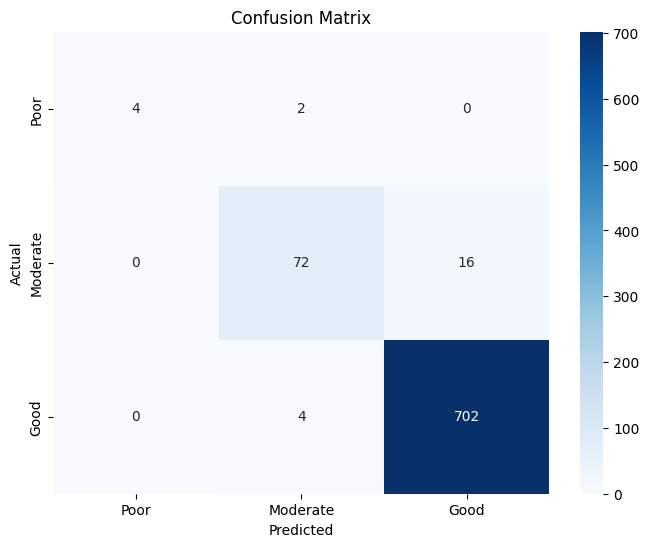

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model', 'X_test', and 'y_test' are from Steps 4 and 5
# If not prepared yet, ensure Steps 1-5 are run first

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", round(accuracy, 3))

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Poor", "Moderate", "Good"]))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Poor", "Moderate", "Good"],
            yticklabels=["Poor", "Moderate", "Good"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Step 7: Analyze Feature Importance

Feature Importances (sorted):
      Feature  Importance
8       P ppm    0.168766
5      O.M. %    0.152748
3          pH    0.124332
7   N_NO3 ppm    0.122550
9      K ppm     0.099358
12     Zn ppm    0.047274
11     Fe ppm    0.035548
13     Mn ppm    0.034842
4    EC mS/cm    0.034380
0      Sand %    0.030655
10     Mg ppm    0.030519
1      Clay %    0.030020
14     Cu ppm    0.025111
6     CACO3 %    0.023610
2      Silt %    0.022026
15      B ppm    0.018260


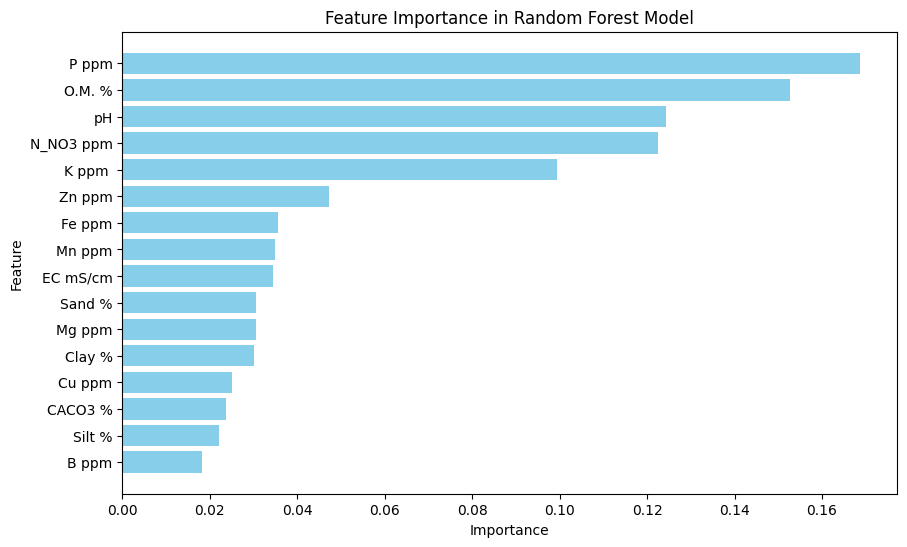

In [ ]:
import pandas as pd

# Assuming 'model' is the trained Random Forest from Step 5 and 'X' or 'X_scaled' from Step 3
# If not prepared yet, ensure Steps 1-6 are run first

# Extract feature importances from the model
feature_importances = model.feature_importances_

# Get feature names (from the original or scaled DataFrame)
feature_names = X_scaled.columns  # Use X.columns if you didn’t convert to DataFrame in Step 3

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance (descending)
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances (sorted):")
print(importances_df)

# Optional: Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

Step 8: Refine the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming 'X_train', 'X_test', 'y_train', 'y_test' are from Step 4
# If not prepared yet, ensure Steps 1-7 are run first

# Step 8a: Handle class imbalance (if needed)
# Check class distribution from Step 4; if imbalanced, use class weights
print("Class distribution in training set (from Step 4):")
print(y_train.value_counts(normalize=True))

# Initialize model with class weights
model_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Adjusts weights inversely proportional to class frequencies
)

# Train the balanced model
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
print("\nAccuracy with class weights:", round(accuracy_score(y_test, y_pred_balanced), 3))

# Step 8b: Hyperparameter tuning with GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5]      # Minimum samples to split a node
}

# Initialize base model
base_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1          # Use all available CPU cores
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("\nBest parameters from GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy:", round(grid_search.best_score_, 3))

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
print("Accuracy of tuned model on test set:", round(accuracy_score(y_test, y_pred_best), 3))

# Update the model variable for future steps
model = best_model
print("Model updated with tuned parameters!")

Class distribution in training set (from Step 4):
Quality
2    0.882812
1    0.109375
0    0.007812
Name: proportion, dtype: float64

Accuracy with class weights: 0.956

Best parameters from GridSearchCV: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.953
Accuracy of tuned model on test set: 0.961
Model updated with tuned parameters!


Step 9: Make Predictions

In [ ]:
import pandas as pd
import joblib

# Load the saved model and scaler from Step 10
model = joblib.load('soil_quality_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define a new soil sample (example values)
new_sample = pd.DataFrame({
    'Sand %': [58.0], 'Clay %': [20.0], 'Silt %': [22.0], 'pH': [7.7], 'EC mS/cm': [0.4],
    'O.M. %': [0.7], 'CACO3 %': [6.0], 'N_NO3 ppm': [4.2], 'P ppm': [6.3], 'K ppm ': [116.0],
    'Mg ppm': [986.0], 'Fe ppm': [12.5], 'Zn ppm': [0.6], 'Mn ppm': [12.5], 'Cu ppm': [0.9],
    'B ppm': [0.2]
})

# Scale the new sample
new_sample_scaled = scaler.transform(new_sample)

# Predict quality
prediction = model.predict(new_sample_scaled)[0]
quality_map = {0: "Poor", 1: "Moderate", 2: "Good"}
quality = quality_map[prediction]

# Analyze reasons and suggest resolutions
reasons = []
recommendations = []
sample = new_sample.iloc[0]

# pH
if sample['pH'] < 5.5:
    reasons.append("Soil too acidic (low pH)")
    recommendations.append("Apply lime to raise pH")
elif sample['pH'] > 8.0:
    reasons.append("Soil too alkaline (high pH)")
    recommendations.append("Add sulfur or organic matter to lower pH")

# EC (salinity)
if sample['EC mS/cm'] > 2.0:
    reasons.append("High salinity (elevated EC)")
    recommendations.append("Leach salts with irrigation or improve drainage")
elif sample['EC mS/cm'] > 1.0 and quality != "Good":
    reasons.append("Moderate salinity")
    recommendations.append("Monitor irrigation water quality")

# Organic Matter
if sample['O.M. %'] < 1.0:
    reasons.append("Low organic matter")
    recommendations.append("Add compost or manure to increase organic matter")
elif sample['O.M. %'] < 2.0 and quality != "Good":
    reasons.append("Suboptimal organic matter")
    recommendations.append("Incorporate cover crops or organic amendments")

# Macronutrients
if sample['N_NO3 ppm'] < 5.0:
    reasons.append("Nitrogen deficiency")
    recommendations.append("Apply nitrogen fertilizer (e.g., urea)")
elif sample['N_NO3 ppm'] < 10.0 and quality != "Good":
    reasons.append("Low nitrogen")
    recommendations.append("Supplement with nitrogen-rich fertilizer")

if sample['P ppm'] < 5.0:
    reasons.append("Phosphorus deficiency")
    recommendations.append("Apply phosphorus fertilizer (e.g., superphosphate)")
elif sample['P ppm'] < 15.0 and quality != "Good":
    reasons.append("Low phosphorus")
    recommendations.append("Add phosphorus amendment")

if sample['K ppm '] < 100.0:
    reasons.append("Potassium deficiency")
    recommendations.append("Apply potassium fertilizer (e.g., potash)")
elif sample['K ppm '] < 150.0 and quality != "Good":
    reasons.append("Low potassium")
    recommendations.append("Supplement with potassium source")

# Texture
if sample['Sand %'] > 70.0:
    reasons.append("Excessively sandy soil (poor nutrient retention)")
    recommendations.append("Add organic matter to improve water and nutrient holding capacity")
elif sample['Clay %'] > 60.0:
    reasons.append("High clay content (poor drainage)")
    recommendations.append("Improve drainage with gypsum or organic matter")

if quality == "Good" and not reasons:
    reasons.append("No significant issues detected")
    recommendations.append("Maintain current soil management practices")

# Display results
print("New Sample Features:")
print(new_sample)
print(f"\nPredicted Soil Quality: {quality}")
print("Reasons:", reasons)
print("Recommendations:", recommendations)

New Sample Features:
   Sand %  Clay %  Silt %   pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  P ppm  \
0    58.0    20.0    22.0  7.7       0.4     0.7      6.0        4.2    6.3   

   K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm  
0   116.0   986.0    12.5     0.6    12.5     0.9    0.2  

Predicted Soil Quality: Moderate
Reasons: ['Low organic matter', 'Nitrogen deficiency', 'Low phosphorus', 'Low potassium']
Recommendations: ['Add compost or manure to increase organic matter', 'Apply nitrogen fertilizer (e.g., urea)', 'Add phosphorus amendment', 'Supplement with potassium source']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Step 10: Save and Deploy the Model

In [ ]:
import joblib
import pandas as pd

# Assuming 'model' is the trained/refined Random Forest from Steps 5/8
# and 'scaler' is the StandardScaler from Step 3
# If not prepared yet, ensure Steps 1-9 are run first

# Step 10a: Save the model and scaler
joblib.dump(model, 'soil_quality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully as 'soil_quality_model.pkl' and 'scaler.pkl'!")

# Step 10b: Example of loading and using the saved model
# Load the model and scaler
loaded_model = joblib.load('soil_quality_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Define a new soil sample (same as Step 9 example)
new_sample = pd.DataFrame({
    'Sand %': [40.0],
    'Clay %': [30.0],
    'Silt %': [30.0],
    'pH': [6.5],
    'EC mS/cm': [0.5],
    'O.M. %': [2.5],
    'CACO3 %': [5.0],
    'N_NO3 ppm': [15.0],
    'P ppm': [20.0],
    'K ppm ': [200.0],
    'Mg ppm': [500.0],
    'Fe ppm': [15.0],
    'Zn ppm': [1.5],
    'Mn ppm': [12.0],
    'Cu ppm': [1.2],
    'B ppm': [0.6]
})

# Scale the new sample with the loaded scaler
new_sample_scaled = loaded_scaler.transform(new_sample)

# Make prediction with the loaded model
prediction = loaded_model.predict(new_sample_scaled)
quality_map = {0: "Poor", 1: "Moderate", 2: "Good"}
predicted_quality = quality_map[prediction[0]]

# Display the result
print("\nUsing the loaded model:")
print("New Sample Features:")
print(new_sample)
print("Predicted Soil Quality:", predicted_quality)

Model and scaler saved successfully as 'soil_quality_model.pkl' and 'scaler.pkl'!

Using the loaded model:
New Sample Features:
   Sand %  Clay %  Silt %   pH  EC mS/cm  O.M. %  CACO3 %  N_NO3 ppm  P ppm  \
0    40.0    30.0    30.0  6.5       0.5     2.5      5.0       15.0   20.0   

   K ppm   Mg ppm  Fe ppm  Zn ppm  Mn ppm  Cu ppm  B ppm  
0   200.0   500.0    15.0     1.5    12.0     1.2    0.6  
Predicted Soil Quality: Good


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Step 11: Create a Simple Prediction Function

In [ ]:
import joblib
import pandas as pd

# Load the saved model and scaler from Step 10
model = joblib.load('soil_quality_model.pkl')
scaler = joblib.load('scaler.pkl')

# Define the enhanced prediction function
def predict_soil_quality_enhanced(sample_data):
    """Predict soil quality, identify reasons, and suggest improvements."""
    feature_order = [
    'Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %',
    'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',  # Changed 'K ppm ' to 'K ppm'
    'Cu ppm', 'B ppm'
]

    # Convert input to DataFrame
    if isinstance(sample_data, dict):
        sample_df = pd.DataFrame([sample_data])
    elif isinstance(sample_data, list):
        sample_df = pd.DataFrame([sample_data], columns=feature_order)
    else:
        raise ValueError("Input must be a dict or list with 16 features.")

    # Ensure all features are present and in the correct order
    if not all(feat in sample_df.columns for feat in feature_order):
        raise ValueError("Input must contain all 16 features in the correct order.")

    # Select features in the expected order
    sample_df = sample_df[feature_order]

    #Scale the new sample
    sample_scaled = scaler.transform(sample_df)

    # Predict quality
    prediction = model.predict(sample_scaled)[0]
    quality_map = {0: "Poor", 1: "Moderate", 2: "Good"}
    quality = quality_map[prediction]

    # Analyze reasons and suggest resolutions
    reasons = []
    recommendations = []
    sample = sample_df.iloc[0]

    if sample['pH'] < 5.5:
        reasons.append("Soil too acidic (low pH)")
        recommendations.append("Apply lime to raise pH")
    elif sample['pH'] > 8.0:
        reasons.append("Soil too alkaline (high pH)")
        recommendations.append("Add sulfur or organic matter to lower pH")

    if sample['EC mS/cm'] > 2.0:
        reasons.append("High salinity (elevated EC)")
        recommendations.append("Leach salts with irrigation or improve drainage")
    elif sample['EC mS/cm'] > 1.0 and quality != "Good":
        reasons.append("Moderate salinity")
        recommendations.append("Monitor irrigation water quality")

    if sample['O.M. %'] < 1.0:
        reasons.append("Low organic matter")
        recommendations.append("Add compost or manure to increase organic matter")
    elif sample['O.M. %'] < 2.0 and quality != "Good":
        reasons.append("Suboptimal organic matter")
        recommendations.append("Incorporate cover crops or organic amendments")

    if sample['N_NO3 ppm'] < 5.0:
        reasons.append("Nitrogen deficiency")
        recommendations.append("Apply nitrogen fertilizer (e.g., urea)")
    elif sample['N_NO3 ppm'] < 10.0 and quality != "Good":
        reasons.append("Low nitrogen")
        recommendations.append("Supplement with nitrogen-rich fertilizer")

    if sample['P ppm'] < 5.0:
        reasons.append("Phosphorus deficiency")
        recommendations.append("Apply phosphorus fertilizer (e.g., superphosphate)")
    elif sample['P ppm'] < 15.0 and quality != "Good":
        reasons.append("Low phosphorus")
        recommendations.append("Add phosphorus amendment")

    if sample['K ppm '] < 100.0:
        reasons.append("Potassium deficiency")
        recommendations.append("Apply potassium fertilizer (e.g., potash)")
    elif sample['K ppm '] < 150.0 and quality != "Good":
        reasons.append("Low potassium")
        recommendations.append("Supplement with potassium source")

    if sample['Sand %'] > 70.0:
        reasons.append("Excessively sandy soil (poor nutrient retention)")
        recommendations.append("Add organic matter to improve water and nutrient holding capacity")
    elif sample['Clay %'] > 60.0:
        reasons.append("High clay content (poor drainage)")
        recommendations.append("Improve drainage with gypsum or organic matter")

    if quality == "Good" and not reasons:
        reasons.append("No significant issues detected")
        recommendations.append("Maintain current soil management practices")

    return {
        "Soil Quality": quality,
        "Reasons": reasons,
        "Recommendations": recommendations
    }

# Example usage
new_sample = {
    'Sand %': 58.0, 'Clay %': 20.0, 'Silt %': 22.0, 'pH': 7.7, 'EC mS/cm': 0.4,
    'O.M. %': 0.7, 'CACO3 %': 6.0, 'N_NO3 ppm': 4.2, 'P ppm': 6.3, 'K ppm ': 116.0, # Changed 'K ppm' to 'K ppm '
    'Mg ppm': 986.0, 'Fe ppm': 12.5, 'Zn ppm': 0.6, 'Mn ppm': 12.5, 'Cu ppm': 0.9,
    'B ppm': 0.2
}

result = predict_soil_quality_enhanced(new_sample)
print("Soil Analysis Result:")
for key, value in result.items():
    print(f"{key}: {value}")

Soil Analysis Result:
Soil Quality: Moderate
Reasons: ['Low organic matter', 'Nitrogen deficiency', 'Low phosphorus', 'Low potassium']
Recommendations: ['Add compost or manure to increase organic matter', 'Apply nitrogen fertilizer (e.g., urea)', 'Add phosphorus amendment', 'Supplement with potassium source']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Step 12: Code to Check Model Accuracy in Percentage

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'model', 'X_test', and 'y_test' are available from previous steps
# If not, ensure Steps 1-6 (or 8) are run first

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy as a decimal (0 to 1)
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = accuracy * 100

# Display the result
print(f"Model Accuracy on Test Set: {accuracy_percentage:.2f}%")

Model Accuracy on Test Set: 96.12%


Step 13-Confirm the Class Imbalance

Class Distribution (Proportions):
Quality
2    0.790
1    0.196
0    0.014
Name: proportion, dtype: float64

Class Counts (Absolute):
Quality
2    3160
1     784
0      56
Name: count, dtype: int64


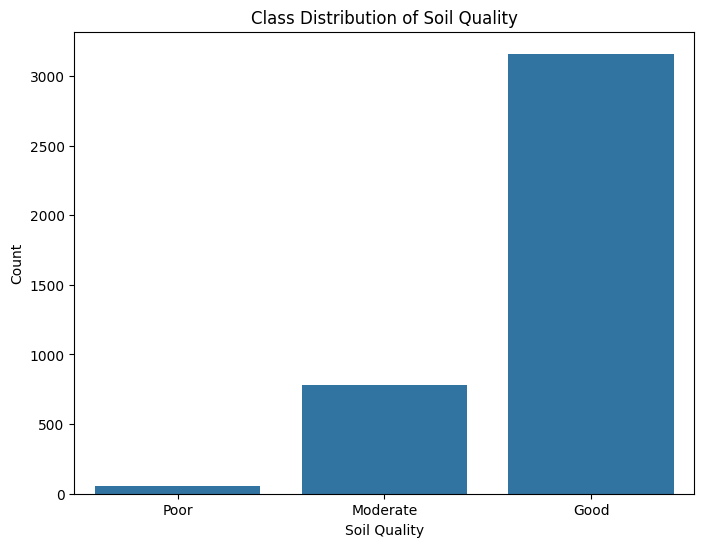

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'soil_data.csv' with your file path)
data = pd.read_excel('/content/SOIL testing data.xlsx')

# Assuming 'Quality' column exists from Step 2
# If not, you need to rerun Step 2 to label the data
def label_soil_quality(row):
    score = 0
    if 6.0 <= row['pH'] <= 7.5: score += 0.25
    elif 5.5 <= row['pH'] < 6.0 or 7.5 < row['pH'] <= 8.0: score += 0.15
    if row['EC mS/cm'] < 1: score += 0.15
    if row['O.M. %'] > 2: score += 0.2
    if row['N_NO3 ppm'] > 10: score += 0.1
    if row['P ppm'] > 15: score += 0.1
    if row['K ppm '] > 150: score += 0.1
    if 20 <= row['Sand %'] <= 50 and 20 <= row['Clay %'] <= 50: score += 0.1
    if score >= 0.7: return "Good"
    elif score >= 0.4: return "Moderate"
    else: return "Poor"

# Apply labeling if not already done
if 'Quality' not in data.columns:
    data['Quality'] = data.apply(label_soil_quality, axis=1)
    data['Quality'] = data['Quality'].map({"Good": 2, "Moderate": 1, "Poor": 0})

# Check class distribution
print("Class Distribution (Proportions):")
print(data['Quality'].value_counts(normalize=True))
print("\nClass Counts (Absolute):")
print(data['Quality'].value_counts())

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=data)
plt.title('Class Distribution of Soil Quality')
plt.xticks(ticks=[0, 1, 2], labels=['Poor', 'Moderate', 'Good'])
plt.xlabel('Soil Quality')
plt.ylabel('Count')
plt.show()

Step 14: Apply a Balancing Technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import joblib
import pandas as pd # Import pandas for handling DataFrames


# Prepare features and target
X = data.drop(columns=["ID's", "Quality"])
y = data['Quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (same as Step 4)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Impute missing values in X_train (if any) before applying SMOTE
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean()).values # Convert X_train to DataFrame, impute, and convert back to NumPy array

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Class Distribution After SMOTE (Training Set):")
print(pd.Series(y_train_balanced).value_counts(normalize=True))
print("\nClass Counts After SMOTE (Training Set):")
print(pd.Series(y_train_balanced).value_counts())

# Retrain the Random Forest model with balanced data
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Optional: Keep this for extra balance
)
model.fit(X_train_balanced, y_train_balanced)

# Save the updated model and scaler
joblib.dump(model, 'soil_quality_model_balanced.pkl')
joblib.dump(scaler, 'scaler_balanced.pkl')
print("Updated model and scaler saved as 'soil_quality_model_balanced.pkl' and 'scaler_balanced.pkl'!")

Class Distribution After SMOTE (Training Set):
Quality
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

Class Counts After SMOTE (Training Set):
Quality
2    2528
1    2528
0    2528
Name: count, dtype: int64
Updated model and scaler saved as 'soil_quality_model_balanced.pkl' and 'scaler_balanced.pkl'!


Step 15: Evaluate the model

Classification Report After Balancing:
              precision    recall  f1-score   support

        Poor       0.83      0.45      0.59        11
    Moderate       0.80      0.97      0.88       157
        Good       1.00      0.95      0.97       632

    accuracy                           0.95       800
   macro avg       0.88      0.79      0.81       800
weighted avg       0.95      0.95      0.95       800



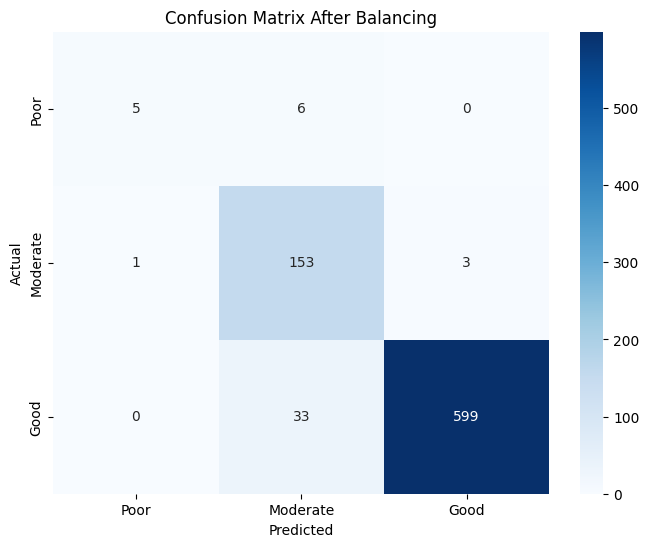

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report After Balancing:")
print(classification_report(y_test, y_pred, target_names=['Poor', 'Moderate', 'Good']))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Poor', 'Moderate', 'Good'],
            yticklabels=['Poor', 'Moderate', 'Good'])
plt.title('Confusion Matrix After Balancing')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Step 16: Update the Prediction Function (Optional)

In [ ]:
import joblib
import pandas as pd

# Load the updated model and scaler
model = joblib.load('soil_quality_model_balanced.pkl')  # or 'soil_quality_model_adjusted.pkl'
scaler = joblib.load('scaler_balanced.pkl')  # or 'scaler_adjusted.pkl'

# Rest of the predict_soil_quality_enhanced function remains the same
def predict_soil_quality_enhanced(sample_data):
    feature_order = [
        'Sand %', 'Clay %', 'Silt %', 'pH', 'EC mS/cm', 'O.M. %', 'CACO3 %',
        'N_NO3 ppm', 'P ppm', 'K ppm ', 'Mg ppm', 'Fe ppm', 'Zn ppm', 'Mn ppm',
        'Cu ppm', 'B ppm'
    ]
    if isinstance(sample_data, dict):
        sample_df = pd.DataFrame([sample_data])
    elif isinstance(sample_data, list):
        sample_df = pd.DataFrame([sample_data], columns=feature_order)
    else:
        raise ValueError("Input must be a dict or list with 16 features.")
    if not all(feat in sample_df.columns for feat in feature_order):
        raise ValueError("Input must contain all 16 features in the correct order.")
    sample_df = sample_df[feature_order]
    sample_scaled = scaler.transform(sample_df)
    prediction = model.predict(sample_scaled)[0]
    quality_map = {0: "Poor", 1: "Moderate", 2: "Good"}
    quality = quality_map[prediction]
    reasons = []
    recommendations = []
    sample = sample_df.iloc[0]
    if sample['pH'] < 5.5:
        reasons.append("Soil too acidic (low pH)")
        recommendations.append("Apply lime to raise pH")
    elif sample['pH'] > 8.0:
        reasons.append("Soil too alkaline (high pH)")
        recommendations.append("Add sulfur or organic matter to lower pH")
    if sample['EC mS/cm'] > 2.0:
        reasons.append("High salinity (elevated EC)")
        recommendations.append("Leach salts with irrigation or improve drainage")
    if sample['O.M. %'] < 1.0:
        reasons.append("Low organic matter")
        recommendations.append("Add compost or manure to increase organic matter")
    if sample['N_NO3 ppm'] < 5.0:
        reasons.append("Nitrogen deficiency")
        recommendations.append("Apply nitrogen fertilizer (e.g., urea)")
    if sample['P ppm'] < 5.0:
        reasons.append("Phosphorus deficiency")
        recommendations.append("Apply phosphorus fertilizer (e.g., superphosphate)")
    if sample['K ppm '] < 100.0:
        reasons.append("Potassium deficiency")
        recommendations.append("Apply potassium fertilizer (e.g., potash)")
    if sample['Sand %'] > 70.0:
        reasons.append("Excessively sandy soil (poor nutrient retention)")
        recommendations.append("Add organic matter to improve water and nutrient holding capacity")
    if quality == "Good" and not reasons:
        reasons.append("No significant issues detected")
        recommendations.append("Maintain current soil management practices")
    return {
        "Soil Quality": quality,
        "Reasons": reasons,
        "Recommendations": recommendations
    }

# Test with a sample
new_sample = {
    'Sand %': 58.0, 'Clay %': 20.0, 'Silt %': 22.0, 'pH': 7.7, 'EC mS/cm': 0.4,
    'O.M. %': 0.7, 'CACO3 %': 6.0, 'N_NO3 ppm': 4.2, 'P ppm': 6.3, 'K ppm ': 116.0,
    'Mg ppm': 986.0, 'Fe ppm': 12.5, 'Zn ppm': 0.6, 'Mn ppm': 12.5, 'Cu ppm': 0.9,
    'B ppm': 0.2
}
result = predict_soil_quality_enhanced(new_sample)
print("Soil Analysis Result:")
for key, value in result.items():
    print(f"{key}: {value}")

Soil Analysis Result:
Soil Quality: Moderate
Reasons: ['Low organic matter', 'Nitrogen deficiency']
Recommendations: ['Add compost or manure to increase organic matter', 'Apply nitrogen fertilizer (e.g., urea)']


Step 17: Accuracy Test

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'model', 'X_test', and 'y_test' are available from previous steps
# If not, ensure Steps 1-6 (or 8) are run first

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy as a decimal (0 to 1)
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage
accuracy_percentage = accuracy * 100

# Display the result
print(f"Model Accuracy on Test Set: {accuracy_percentage:.2f}%")

Model Accuracy on Test Set: 94.62%
